In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

### Load the integration data

In [2]:
data = np.load('data/double_pendulum_order_comparison_4_limit.npz')

In [3]:
q_list = data['q_list']
print('System coordinates are {}'.format(q_list))

System coordinates are ['theta_1' 'theta_2']


In [4]:
t_list = data['t_list']
q_solutions = data['q_solutions']
p_solutions = data['p_solutions']
l1, l2 = data['ls']

## Graph coordinate evolution

In [5]:
def multiple_formatter(denominator=4, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=4, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

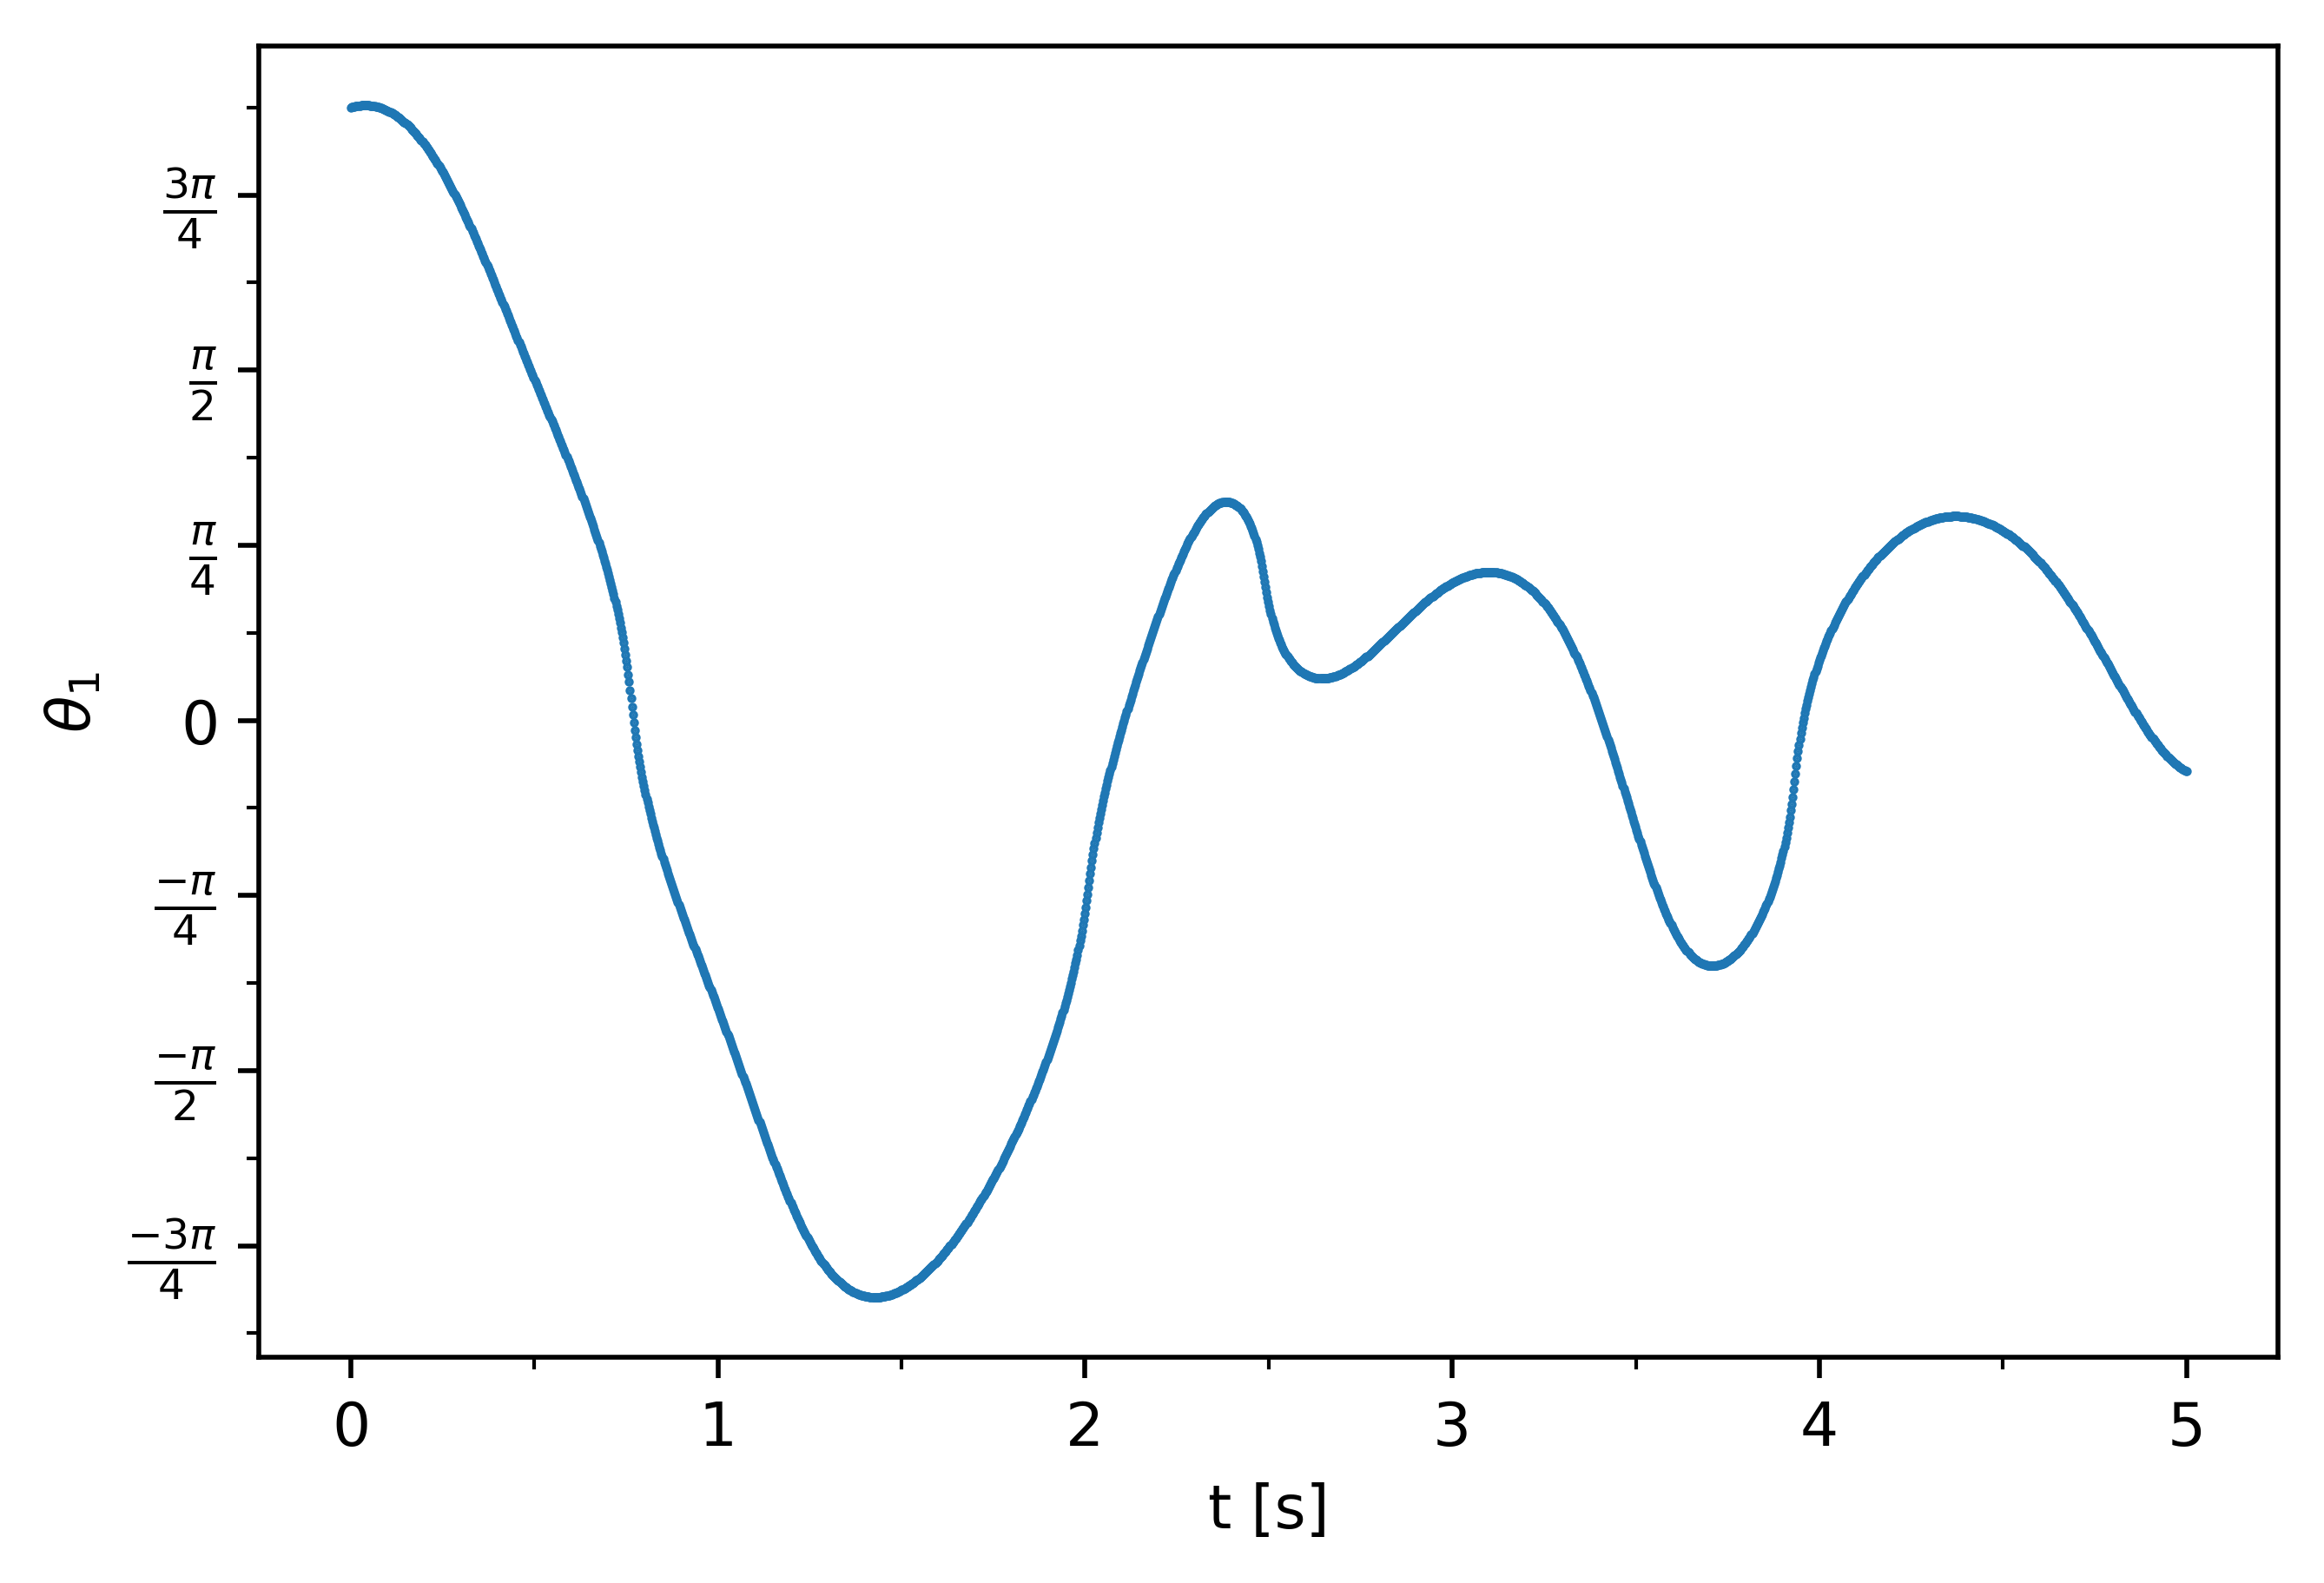

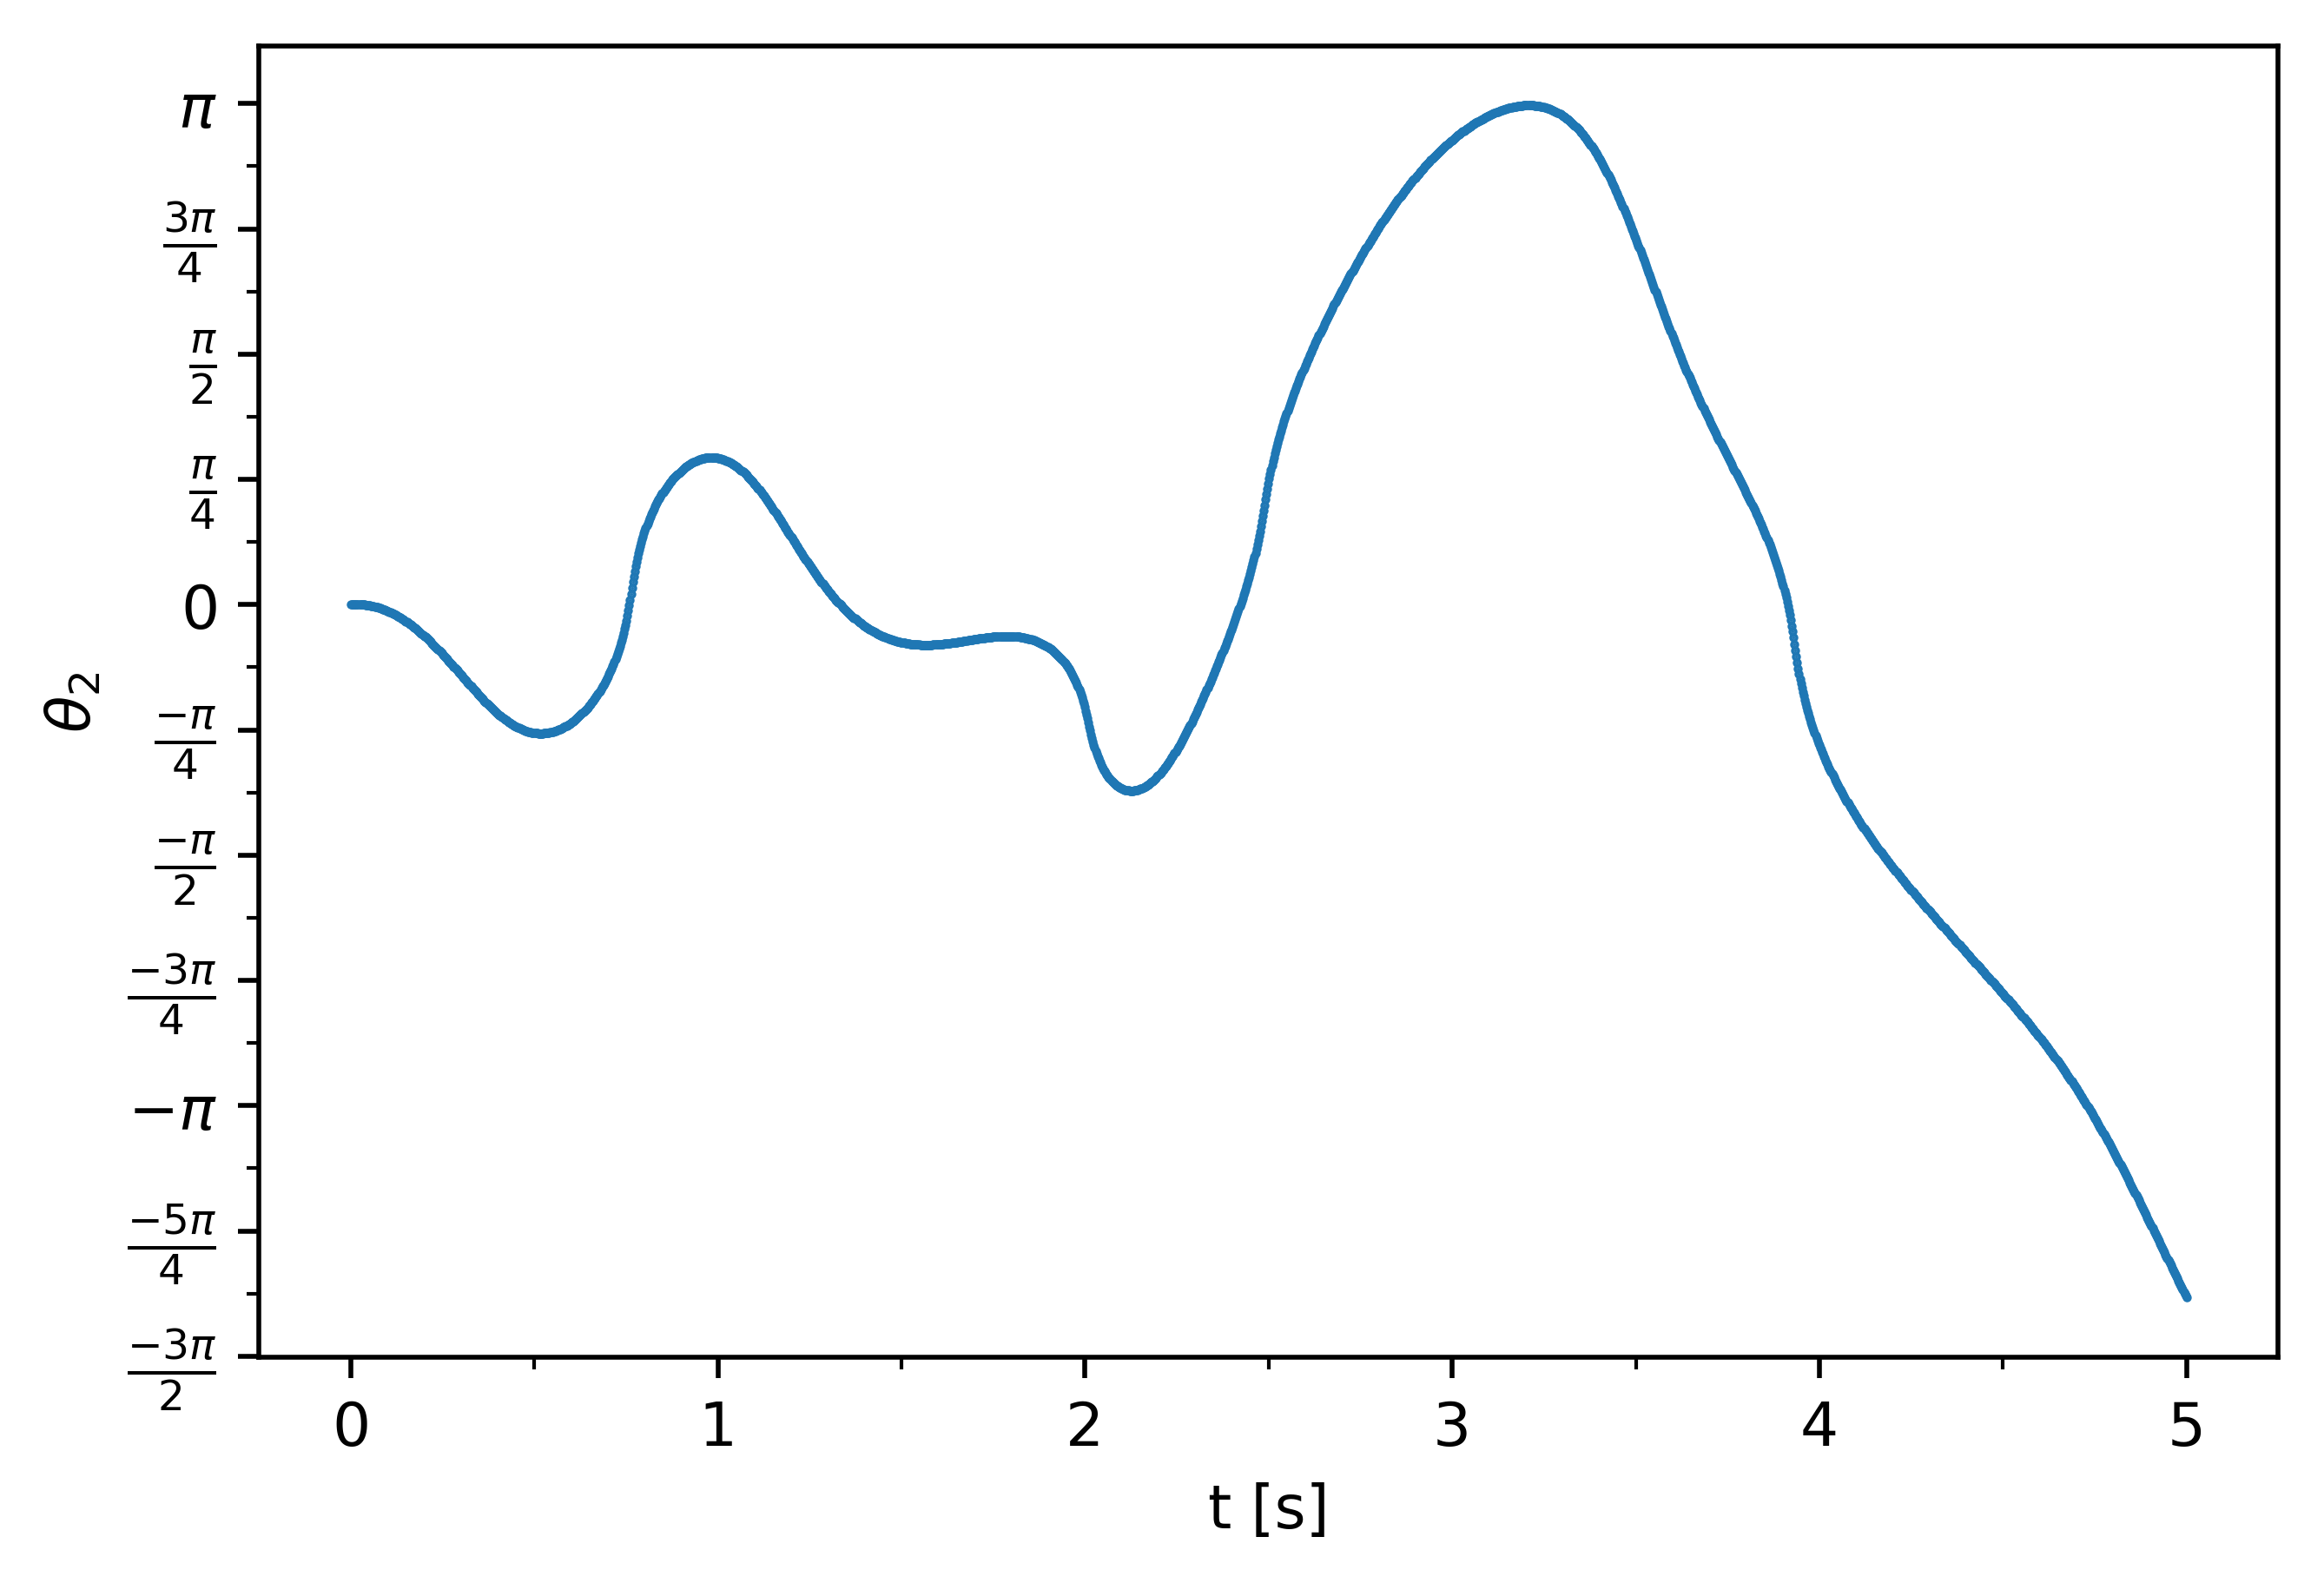

In [6]:
for i in range(0, 2):
    plt.figure(dpi=500)
    plt.plot(t_list, [q_solutions[j].take(i) for j in range(0, len(q_solutions))], '.', MarkerSize=1)
    plt.xlabel('t [s]')
    plt.ylabel('$\\' + q_list[i] + '$')
    ax = plt.gca()
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 4))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(4)))

## Compute x, y positions of pendulum arms

In [7]:
origin = (0, 0)

In [8]:
xs = []
ys = []

In [9]:
for index, element in enumerate(q_solutions):
    x = np.cumsum([origin[0],
                       l1 * np.sin(element.take(0)),
                       l2 * np.sin(element.take(1))])
    y = np.cumsum([origin[1],
                       -l1 * np.cos(element.take(0)),
                       -l2 * np.cos(element.take(1))])
    xs.append(x)
    ys.append(y)

Animation size has reached 21063460 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


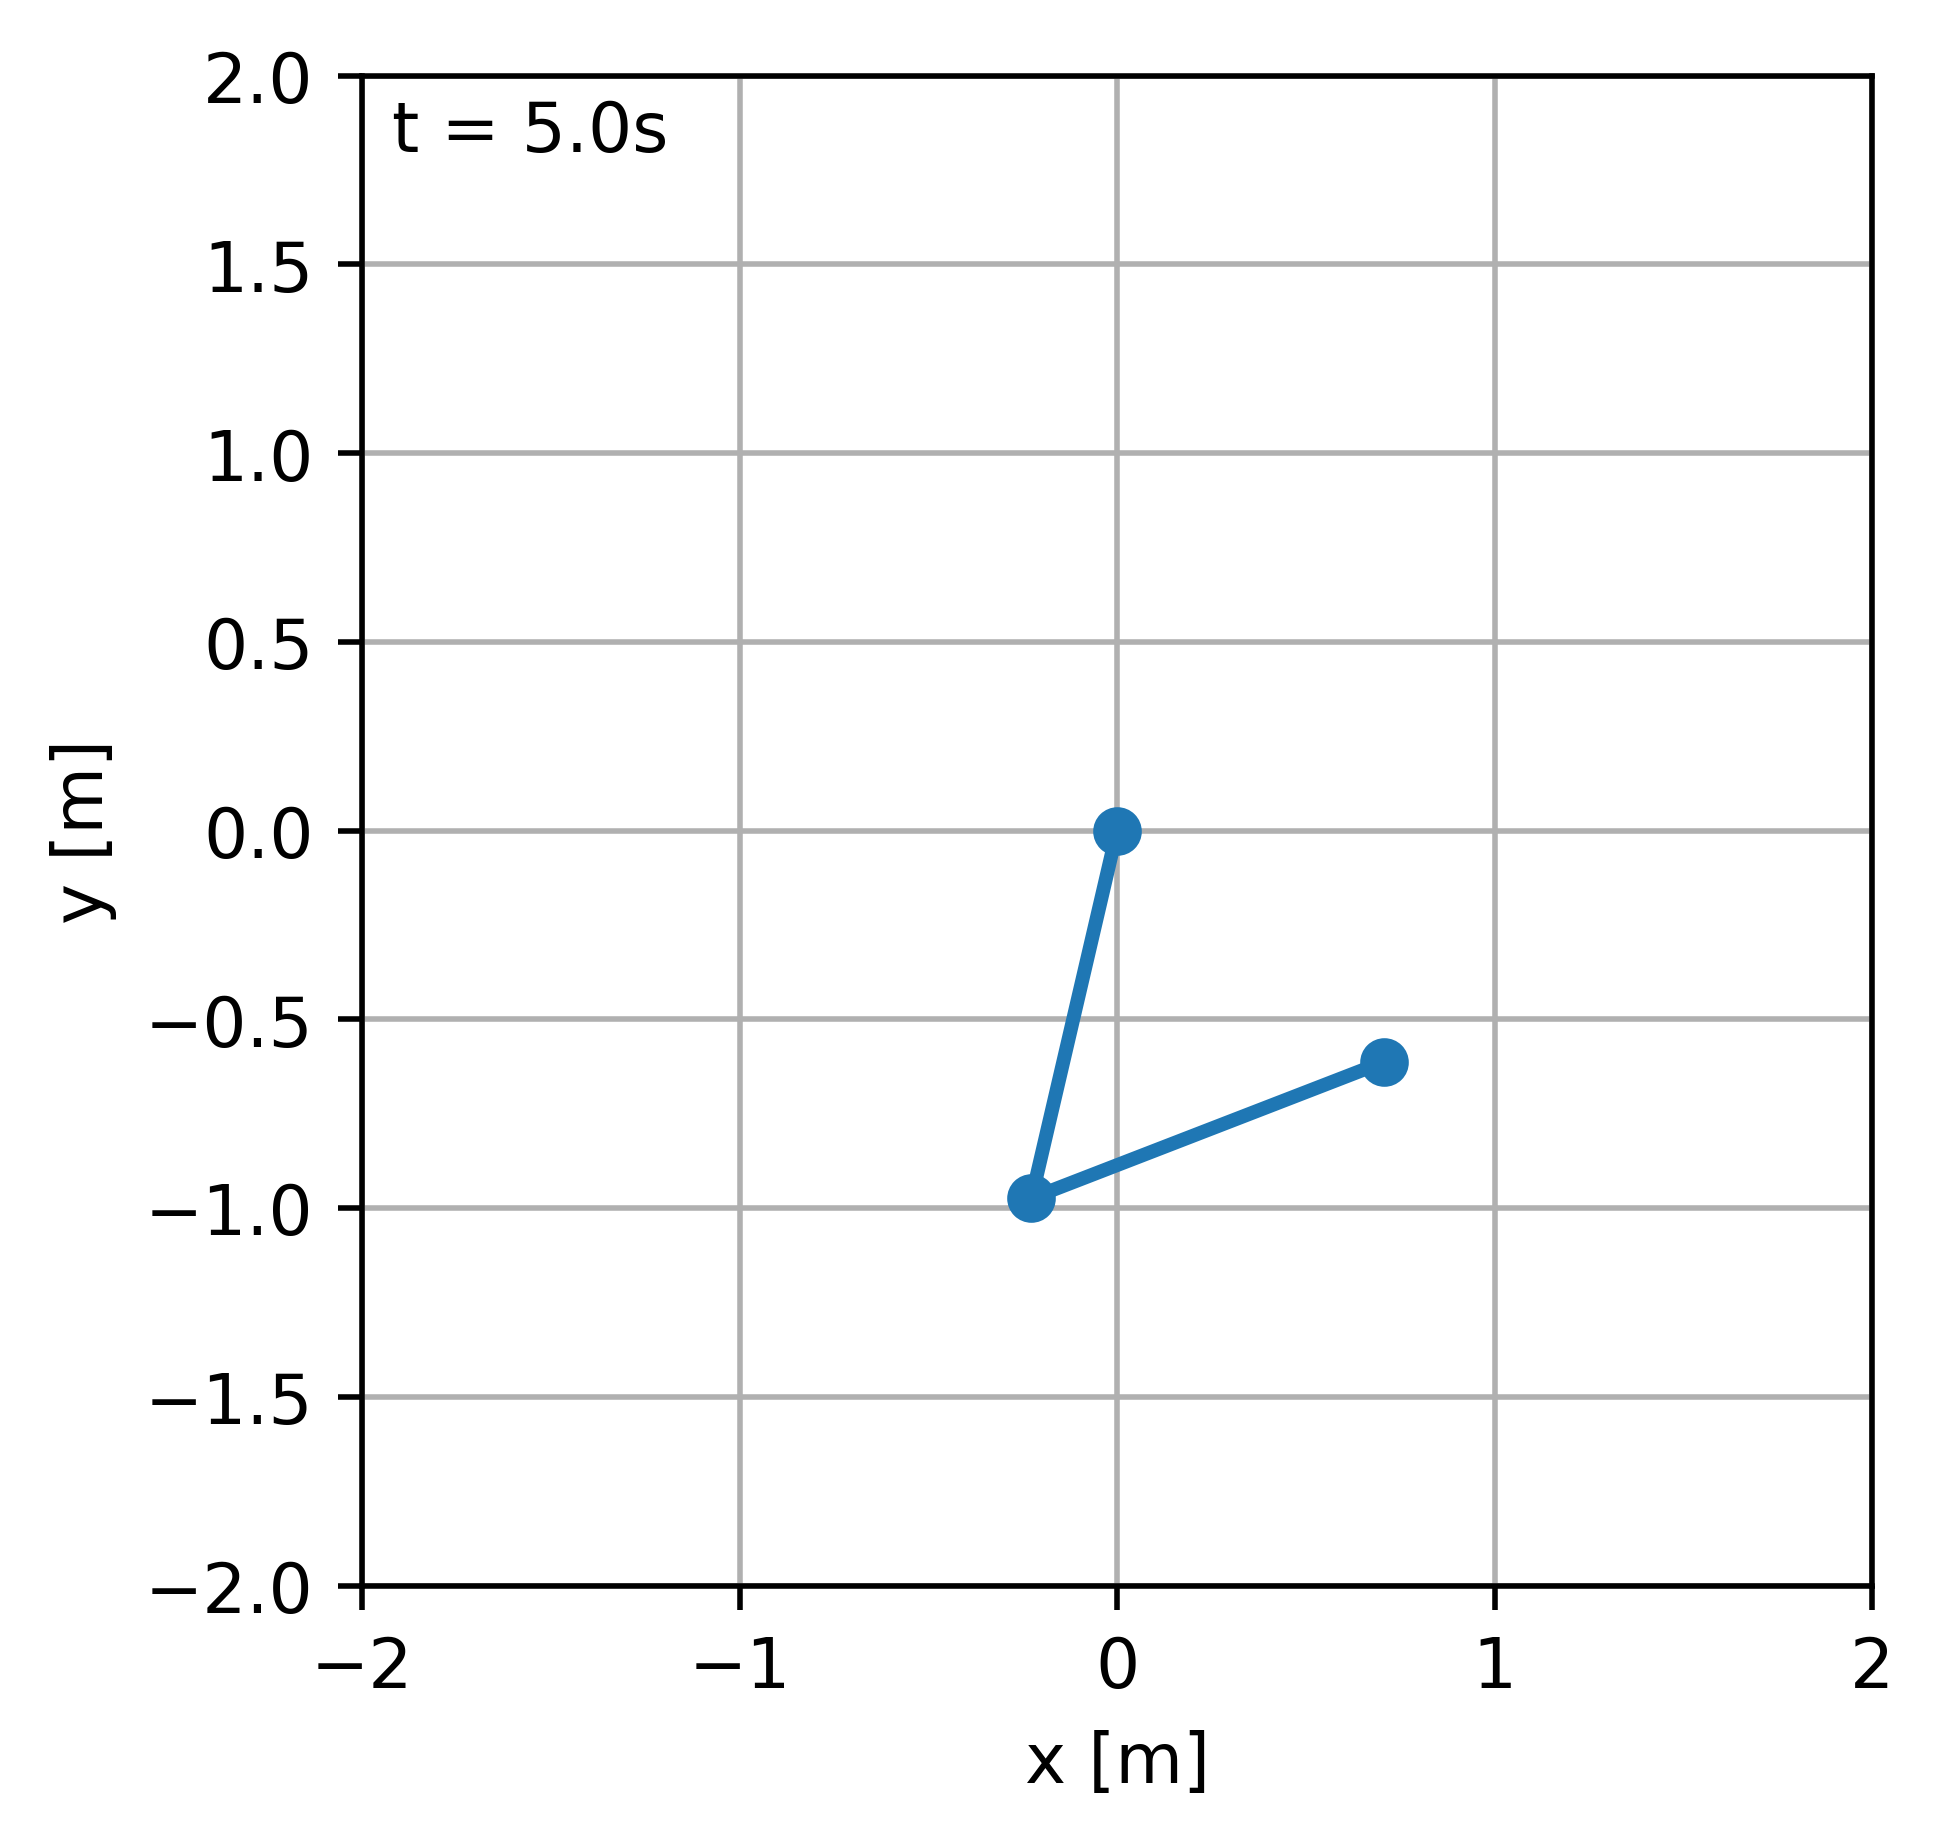

In [12]:
# set up figure and animation
fig = plt.figure(dpi=500)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    """initialize animation"""
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    """perform animation step"""
    line.set_data(xs[i], ys[i])
    time_text.set_text('t = %.1fs' % t_list[i])
    return line, time_text

dt = t_list[2] - t_list[1]
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)

ani = animation.FuncAnimation(fig, animate, frames=len(q_solutions),
                              interval=interval, blit=True, init_func=init)

rc('animation', html='jshtml')
rc

HTML(ani.to_jshtml())

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
ani.save('double_pendulum.mp4', fps=120, extra_args=['-vcodec', 'libx264'])


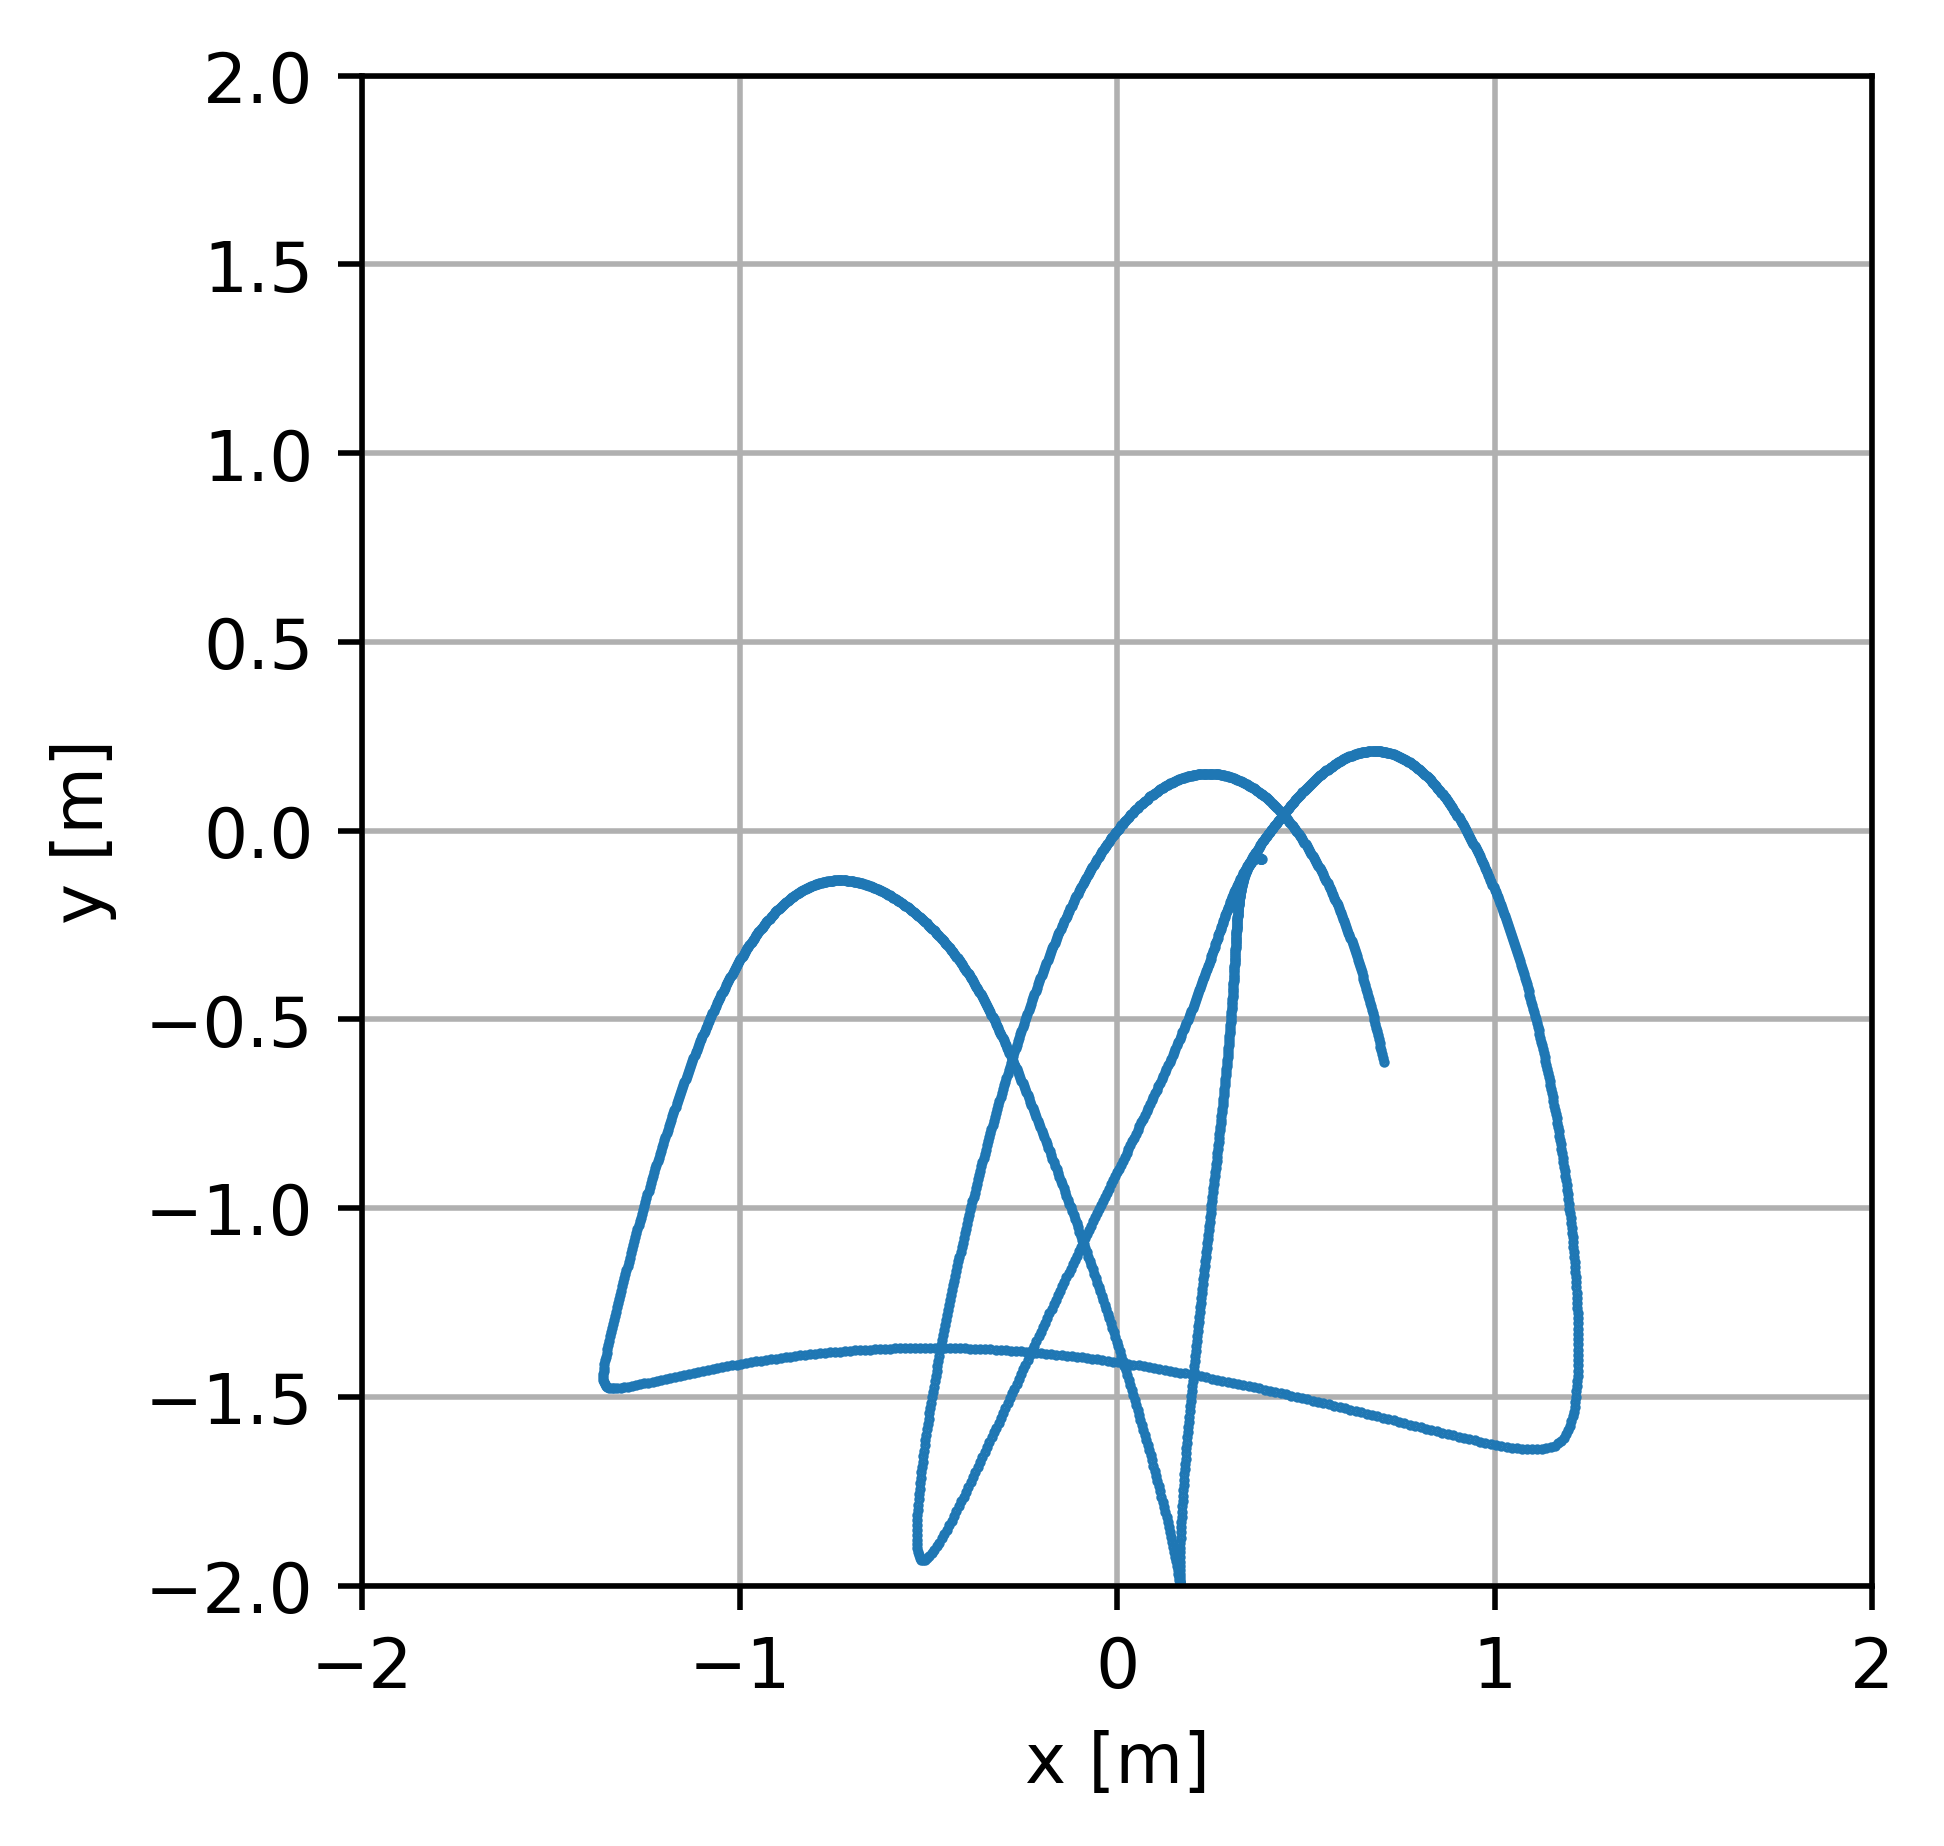

In [11]:
plt.figure(dpi=500)
plt.plot([xs[i][2] for i in range(0, len(xs))], [ys[i][2] for i in range(0, len(ys))], '.', MarkerSize=1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
ax = plt.gca()
ax.set_aspect('equal')
ax.set_xlim(-2, 2)
ax.set_ylim(-2,2)
ax.grid()